In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Pre-main-sequence evolution 

In the lecture, we have discussed how stars form from molecular clouds. The clouds collapse and fragment. We now assume that one such fragment has accreted a total of $1\,\mathrm{M}_\odot$ and is now contracting to become a star. Once the proto-star has formed, it evolves as a pre-main-sequence (PMS) star. As we have discussed, such stars are initially fully convective and we can thus solve the stellar structure using the formalism that we have developed for polytropes. Such a polytrope is in fact the initial model for MESA (recall that stellar evolution codes use relaxation methods to solve the stellar structure equations for a given initial model) and we will follow the evolution of such a PMS star now in MESA.

We have prepared a zip-file that contains the basic settings to evolve a star of $1\,\mathrm{M}_\odot$ with MESA (05.pre_main_sequence.zip available via the Physik Uebungssystem). Please download the file, extract it (e.g. use `unzip` in the terminal) and `cd` into the extracted folder. Now compile MESA as you have learned last time (`./mk`). You are now ready to run the model with `./rn`, but before you do so, we look a bit closer at what kind of output MESA produces. (In case you have issues with MESA, you can also download the MESA output [here](http://wwwstaff.ari.uni-heidelberg.de/fschneider/teaching/stellar-cookbook/1M_pre_ms.tar.gz). To extract the files on the command line, use `tar xzvf <file.tar.gz>` within the corresponding model folder.)

## MESA output
MESA produces two types of output:
1. History data: stellar properties over time (e.g. surface luminosity and effective temperature)
2. Profile data: interior profiles of properties at fixed times (e.g. internal density and temperature as a function of radius/mass coordinate)

These data can be visualised on the fly using `pgstar` or plotted later using the files created in the `log_directory` that one can specify in the `inlists`. By default, MESA uses the `LOGS` folder. In this lab, we will now use `pgstar` and the MESA output to look into the pre-MS evolution of a $1\,\mathrm{M}_\odot$ star and learn about some key stages of this evolutionary phase.

### Pgstar
Open the file `inlist_pgstar` in your favourite text editor. By default, the file should contain the following options:
```
! history data
HR_win_flag = .true.
TRho_win_flag = .true.
Kipp_win_flag = .true.

! profile data
TRho_Profile_win_flag = .true.
Abundance_win_flag = .true.
Power_win_flag = .true.
```
This instructs `pgstar` to display separate windows for a Hertzsprung-Russell diagram (`HR_win_flag`), central-temperature-vs-central-density plot (`TRho_win_flag`), a Kippenhahn diagram (`Kipp_win_flag`), a full profile view of temperature and density from core to envelope (`TRho_Profile_win_flag`), a chemical abundance profile (mass fractions, `Abundance_win_flag`) and a nuclear-burning profile (`Power_win_flag`). **Please take a moment to look carefully into the diagrams and discuss with your colleagues what you are looking at exactly.** You may want to pause the MESA run to have more time to understand the `pgstar` output (see 'General remarks' below regarding how to pause, continue and terminate commands that are running in the terminal).

While MESA is running and `pgstar` is displaying output, disable one of the windows by setting the corresponding option to `.false.` and save the changes. You will notice that MESA pauses and waits for you to press `Return`. Thereafter, the chosen window won't be shown anymore. So you can modify the `pgstar` options during runtime. A very useful way to modify the on-the-fly plotting to learn and understanding what is happening inside stars!

You can also modify the displays. For example, if you prefer a smaller or bigger window, you could use the `width` attribute and/or modify the text scaling. For the HR window, try adding
```
HR_win_width = 10
HR_txt_scale = 1.1
```
to your `pgstar` inlist (the window width is now larger and the text scale increased by 10%). All `pgstar` options can be found in the `pgstar.defaults` file in the `defaults` folder of MESA's `star` module (i.e. `mesa/star/defaults/pgstar.defaults`). The MESA online tutorial about `pgstar` can be found here: http://mesa.sourceforge.net/pgstar.html

Next, try some of the pre-defined `pgstar` grids that combine certain output into one window. Just add 
```
Grid1_win_flag = .true.
```
to your `inlist_pgstar` file and try different grids. As with the individual windows, you can modify the width, text scaling etc. of the grids. I personally think that Grid2 together with a Kippenhahn diagram is often useful. But you can also design your own specialised grids for your needs (if you like, you can try this at home).

#### Problem 1:
Closely watch the evolution of the star and answer the following questions:
1. Where is the Hayashi line?
2. In quite general terms, what happens to the star during the pre-MS phase? What terminates the pre-MS phase?
    Star gets hotter and denser until it stops burning hydrogen. 
3. Why does the star evolve off the Hayashi line? What has happened in the core at this point and why? Why does the star turn to *hotter* and not *cooler* effective temperatures?
Once core becomes radiative, star moves to other temperatures (T is increasing). 

#### Problem 2:
As you described above, the core of the star heats up during the pre-MS contraction. There are various temperature and density thresholds beyond which some nuclear burning occurs. With the current model, you cannot see all the details because we use a simplified nuclear-reaction network that does not trace all chemical elements. For example, there is deuterium and lithium burning at some point as part of the pp chains. As a reminder, here is a summary of the pp-chains:

<img src="pp-chains.png" alt="pp-chains" width="600"/>

1. What is meant by 'lithium' and 'deuterium' burning and how could you notice this in your model? Unfortunately, we do not trace lithium at the moment, so you won't be able to observe this easily (however, some of you may have noticed that you could use a different nuclear network and thereby also follow lithium abundances - at home, feel free to modify the inlists to follow lithium and other elements).
2. Can you observe signs of deuterium burning while the model evolves? Is there deuterium burning on the Hayashi line?
3. Now, pay attention to carbon, nitrogen and oxygen. What has happened in the star towards the end of the pre-MS phase and why? In fact, the small wiggle at the end of the pre-MS evolution in the HR diagram is caused by this kind of nuclear burning.

### History and Profile data
We now want to use the output that MESA writes to look more into stellar models. To get used to these data, we will no use the Python package 'MESA Reader' (a documentation can be found [here](https://wmwolf.github.io/py_mesa_reader)). First, import the module in python: 

In [2]:
import mesa_reader as mr

MESA Reader is a powerful tool that makes all the output available to Python in an easy-to-use way. For example, let's make a HR diagram. First, tell MESA Reader where to find the output of a specific run (please adjust the path to your MESA log folder accordingly):

In [3]:
log = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/LOGS_1M_pre_ms')
#log?

With the `log?` command, we can always get help and info about Python structures. Here, we can see that the history data can be accessed via `log.history`. In MESA's history file, each column contains data as a function of time and each snapshot in time has a model number. For example, the age or time of a run, is saved in the column with name `star_age`. Each such data elements are `Numpy` arrays. To access the data, you can call

* `log.history.data('star_age')` or
* `log.history.star_age`.

MESA Reader makes all columns accessible this way. Because the data are standard `Numpy` arrays, we can, for example, access the age of the model at the end of the run as the last element stored in `star_age` (the age being given in units of years):

In [4]:
log.history.star_age[-1]

531521273.8321815

Before a run, MESA looks into the files `history_columns.list` and `profile_columns.list` to decide which output to put into the history and profile files. If these files are not provided locally, it uses standard files shipped with MESA in the `star` module. 

Now, open `history_columns.list` from your local MESA run directory in your favourite text editor and have a look which quantities are available by default. By uncommenting lines, the chosen output quantity will be computed by MESA and then be put into your history file.

### A first Hertzsprung-Russell diagram

In `history_columns.list`, you can see that the columns containing the luminosity and effective temperature of the model at the surface are called `log_L` and `log_Teff`. Using these, we can now make a HR diagram. Remember that you can invert the x-axis in Matplotlib with the command `plt.gca().invert_xaxis()`. As usual, we should never forget to add labels to our x- and y-axes (via the `plt.xlabel()` and `plt.ylabel()` commands).

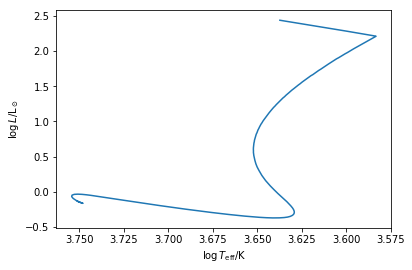

In [5]:
log_L = log.history.log_L
log_Teff = log.history.log_Teff

plt.plot(log_Teff, log_L)

plt.xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')
plt.ylabel(r'$\log\,L/\mathrm{L}_\odot$')

plt.gca().invert_xaxis()

#### Problem 4:
1. How much time does the star need to reach the zero-age main-sequence (ZAMS)?
2. Compare this time to the Kelvin-Helmholtz timescale of the star at the ZAMS. What do you find and why?

In [6]:
# Your solution here

## General remarks
You can simply re-run the MESA model in this lab to have more time to play with `pgstar` and get more familiar with it. Running this pre-MS evolution won't take long. The [MESA webpage](http://mesa.sourceforge.net/pgstar.html) has further information on `pgstar` options beyond what is described here.

Also, you can pause the computation at any time by pressing `Ctrl+S` in the terminal; `Ctrl+Q` will resume the computation and `Ctrl+C` will terminate it (the latter can be used to terminate any command currently running in the terminal, including MESA runs).

#### Student-report: (*please continue reading about MESA profile output as we will need it soon*)
In your student report on the pre-MS evolution, you will compare the fully convective model on the Hayashi line of a solar-like star to polytropic stellar models that you computed earlier during the course. Similarly to how to read the history data, you can access the profile data. The only difference is that you have to pick which profile to look at, i.e. at which time in the evolution of the star. 

First, let's have a look for which models of the run we have profiles available (note that you can adjust the frequency with which profiles are stored in your `inlist`). To this end, execute the commands below.

In [7]:
print('model numbers:', log.profiles.model_numbers)
print('profile numbers:', log.profiles.profile_numbers)

model numbers: [  1  50 100 150 200 244 250 263]
profile numbers: [1 2 3 4 5 6 7 8]


The profile numbers are used to locate that file that contains the profiles for one specific profile number. In the above example, model number 100 is stored in the file with profile number 3, i.e. in the file `profile3.data`. The profile data contained in such files is controlled via the `profile_columns.list` file, similar to how the `history_columns.list` file controls the output quantities in the history files.

Now, let's load the profile data corresponding to model number 100. This is done by executing the following command:

By typing `p100.header_data`, you will get an overview of the state of the model at the chosen model number. In this case, the output looks like this (truncated):

```
{'model_number': 100,
 'num_zones': 578,
 'initial_mass': 1.0,
 'initial_z': 0.02,
 'star_age': 2473.478038219038,
 'time_step': 225.339188218187,
 'Teff': 4020.876185253487,
 'photosphere_L': 80.27066680444969,
 'photosphere_r': 18.48825283167823,
 ...
}
```

For example, you will see that the star consists of 578 shells and that it has an effective temperature of $\approx4000\,\mathrm{K}$ and a luminosity of $\approx 80\,\mathrm{L}_\odot$. So the star is still on the Hayashi line at this time (2473 yr) and is fully convective as you can check with the help of the `pgstar` Kippenhahn window that you saw during the evolution.

The profiles of this model are now accessible via `p100.data('<name>')` or directly via `p100.<name>` as with the history data before. In MESA, profile output is provided from surface to core, i.e. the first entry of a list has the surface value while the last entry has the central value.

MESA Reader is quite smart. Imagine we want to look at the radial coordinates of the 578 shells contained in this model. By default, only the logarithmic radius is stored, but if you type `p100.R`, MESA Reader sees that no quantity with name `R` exists in the data, so it searches for `logR` instead and then delivers the correct `R` values by exponentiation. This also works if only `lnR` is stored and it also works with history output.

Equipped with this knowledge, answer the following questions:

1. Plot the relative density $\rho/\rho_\mathrm{c}$ as a function of relative radius $r/R$ and compare to polytropic models you computed earlier. Which polytropic index best fits the star? What was your expectation and does it deviate? If so, why? If not, why not?
2. For your best polytropic index, what is the polytropic constant $K$? Recall the mass-radius relation of polytropes and how it is related to the polytropic constant. You now have a complete polytropic model that best fits the fully convective star computed with MESA and you could use this semi-analytical solution to study the model further.

At later times, the star is no longer fully convective and you cannot fit the structure with only one polytrope. But you could use two or more polytropes and smoothly connect them at some fitting point.

In [8]:
# function to integrate Lane-Emden equation from polytrope lab - you can also use your own function!
def polytrope(n, h=1e-3, x_max=20.0):
    xi = 1e-5 # initial point in center; avoid exactly zero
    yi = 1.0
    zi = 0.0
    
    x = []
    y = []
    z = []
    
    while yi>=0. and xi<=x_max:
        # compute Euler step for next point
        xj = xi + h
        yj = yi + zi*h
        zj = zi + (-2.0*zi/xi - yi**n)*h
        
        # add point to output array
        x.append(xj)
        y.append(yj)
        z.append(zj)
        
        # set new points to old points for next step
        xi = xj
        yi = yj
        zi = zj
    
    # get surface properties (linear interpolation)
    ysurf = 0.0
    xsurf = (x[-2]-x[-1])/(y[-2]-y[-1])*(ysurf-y[-1])+x[-1]
    zsurf = (z[-2]-z[-1])/(y[-2]-y[-1])*(ysurf-y[-1])+z[-1]
        
    return (np.array(x), np.array(y), np.array(z), xsurf, ysurf, zsurf)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in power


Text(0.5,1,'Relative Density vs. Relative Radius')

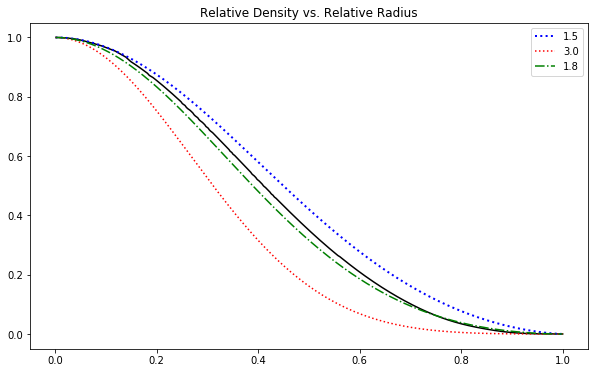

In [11]:
x_15,y_15,z_15,xs_15,ys_15,zs_15 = polytrope(1.5)
x_17,y_17,z_17,xs_17,ys_17,zs_17 = polytrope(1.7)
x_16,y_16,z_16,xs_16,ys_16,zs_16 = polytrope(1.6)



p100 = log.profile_data(100)
#logR=p100.data('logR')
logRho = 10**(p100.data('logRho'))
Rho_c = logRho/logRho[-1]
logR = 10**(p100.data('logR'))
R_c = logR/logR[1]


plt.figure(figsize=(10,6))
plt.plot(R_c,Rho_c,color='black')
plt.plot(x_15/xs_15, np.power(y_15,1.5),label=1.5,ls=':',lw=2,c='blue')
plt.plot(x_16/xs_16, np.power(y_16,3.0),label=3.0,ls=':',c='red')
plt.plot(x_17/xs_17, np.power(y_17,1.8),label=1.8,ls='-.',c='green')
plt.legend()
plt.title('Relative Density vs. Relative Radius')
#plt.xlabel()
#plt.ylabel()


#Your solution here
use equation in part c of politropes student report 3